In [20]:
!mkdir -p dados
!wget https://raw.githubusercontent.com/MarcosVeniciu/Trabalho-Pratico-Introducao-a-Ciencia-dos-Dados/main/dados/ocorrencia.csv https://raw.githubusercontent.com/MarcosVeniciu/Trabalho-Pratico-Introducao-a-Ciencia-dos-Dados/main/dados/ocorrencia_tipo.csv https://raw.githubusercontent.com/MarcosVeniciu/Trabalho-Pratico-Introducao-a-Ciencia-dos-Dados/main/dados/aeronave.csv https://raw.githubusercontent.com/MarcosVeniciu/Trabalho-Pratico-Introducao-a-Ciencia-dos-Dados/main/dados/fator_contribuinte.csv https://raw.githubusercontent.com/MarcosVeniciu/Trabalho-Pratico-Introducao-a-Ciencia-dos-Dados/main/dados/recomendacao.csv -P dados
!pip install pandas
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [102]:
import pandas as pd

In [108]:
df_ocorrencia = pd.read_csv("dados/ocorrencia.csv", sep=";")
df_ocorrencia_tipo = pd.read_csv("dados/ocorrencia_tipo.csv", sep=";")
df_aeronave = pd.read_csv("dados/aeronave.csv", sep=";")
df_fator_contribuinte = pd.read_csv("dados/fator_contribuinte.csv", sep=";")
df_recomendacao = pd.read_csv("dados/recomendacao.csv", sep=";")

## Limpeza dos dados

### Removendo codigos de ocorrência redundantes

In [104]:
df_ocorrencia_tipo.rename(columns={"codigo_ocorrencia1": "codigo_ocorrencia"}, inplace=True)
df_aeronave.rename(columns={"codigo_ocorrencia2": "codigo_ocorrencia"}, inplace=True)
df_fator_contribuinte.rename(columns={"codigo_ocorrencia3": "codigo_ocorrencia"}, inplace=True)
df_recomendacao.rename(columns={"codigo_ocorrencia4": "codigo_ocorrencia"}, inplace=True)
df_ocorrencia.drop(
    columns=[
        "codigo_ocorrencia1",
        "codigo_ocorrencia2",
        "codigo_ocorrencia3",
        "codigo_ocorrencia4",
    ],
    inplace=True,
)

## Questões

1.  Qual é o tipo de ocorrência mais comum? <br />
2.  Que tipo de ocorrência está mais associado a fatalidades? <br />
3.  O que poderia ser feito para evitar outras ocorrências? <br />
4.  Existe uma relação entre a fase de operação e fatalidades? <br />
5.  Existe uma relação entre a fabricante da aeronave e o tipo de ocorrência? <br />
6.  Existe uma relação entre o modelo da aeronave e o tipo de ocorrência? <br />
7.  Existe uma relação entre o fator contribuinte e o tipo de ocorrência? <br />
8.  Existe algum componente das aeronaves que está associado com os acidentes? <br />
9.  Existe alguma região associada com um elevado número de acidentes? <br />
10. Quais os acidentes mais frequentes por região do país? <br />
11. O horário possui relação com os acidentes? <br />
12. Qual a relação entre o tipo de aeronave e a frequência dos acidentes? <br />
13. Qual a relação entre tipo de acidente e a fatalidade? <br />
14. Qual a frequência de acidentes em relação aos mesese? <br />
15. A quantidade de acidentes aumentou o diminuiu ao longo dos anos observados? <br />
16. A quantidade de fatalidades aumentou o diminuiu ao longo dos anos observados? <br />
17. Qual a porcentagem de acidente que possuem fatalidades? <br />
18. Qual a porcentagem de acidentes por operação particular, regular e taxi áereo? <br />
19. Qual as fases de operação com maior taxa de acidentes? <br />
20. Qual a taxa de acidentes em relação ao ano de fabricação das aeronaves? <br />


### 01. Qual é o tipo de ocorrência mais comum?

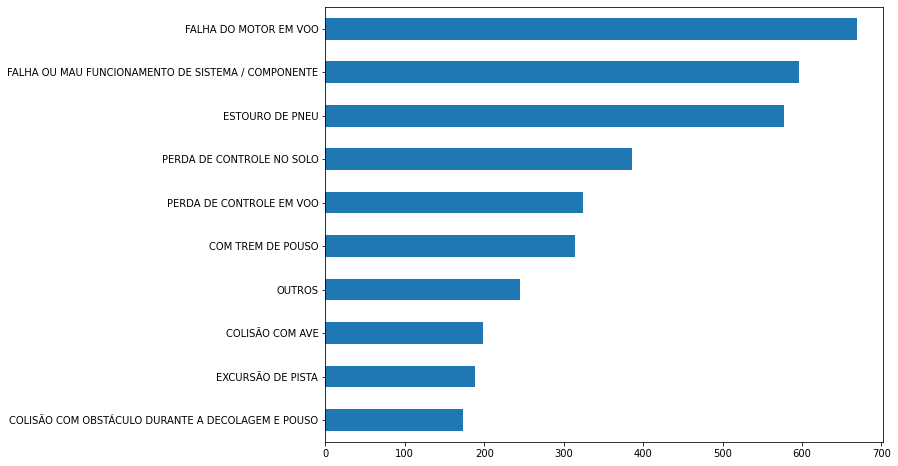

In [105]:
ocorrencia_tipo_count = df_ocorrencia_tipo["ocorrencia_tipo"].value_counts()

ax = ocorrencia_tipo_count[:10].plot.barh(figsize=(10, 8))
ax.invert_yaxis()

Podemos ver que o tipo de ocorrência mais comum é a **falha do motor em voo**, seguido da **falha ou mau funcionamento de sistema / componente**.

### 02. Que tipo de ocorrência está mais associado a fatalidades? 

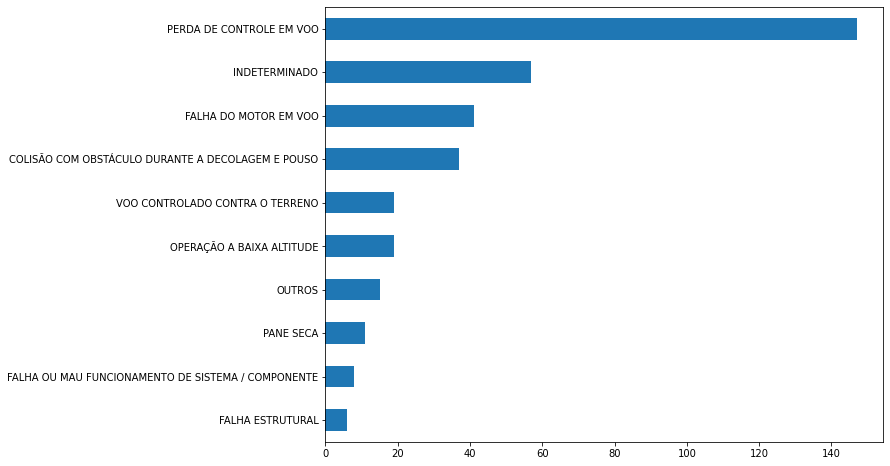

In [106]:
codigo_fatalidades = df_aeronave.loc[df_aeronave["aeronave_fatalidades_total"] > 0][
    "codigo_ocorrencia"
].drop_duplicates()

df_ocorrencia_tipo_com_fatalidades = df_ocorrencia_tipo.loc[
    df_ocorrencia_tipo["codigo_ocorrencia"].isin(codigo_fatalidades)
]

ax = (
    df_ocorrencia_tipo_com_fatalidades["ocorrencia_tipo"]
    .value_counts()[:10]
    .plot.barh(figsize=(10, 8))
)
ax.invert_yaxis()

Pelo gráfico é notável que a **perda de controle em voo** é o tipo de ocorrência em que mais ocorrem fatalidades.